In [1]:
import numpy as np
import matplotlib.pyplot as plt
# theta = pi/6

In [2]:
lossres = np.zeros((3,96,100))
std_loss = np.zeros((3,96,100))
bestloss = np.zeros((3,96,100))
deepparam = np.zeros((3,96,100))

In [3]:
for i in range(96):
    loaded = np.load(f'../outputs/syn-exp-6-{i}.npy')
    mean_loss = np.mean(loaded[:,:,:,:,0], axis = -1)
    stdofloss = np.std(loaded[:,:,:,:,0], axis = -1)
    min_loss = np.min(mean_loss, axis = -1)
    std_loss[:,i,:] = np.take_along_axis(stdofloss, np.expand_dims(np.argmin(mean_loss, axis=-1), axis=-1), axis=-1).squeeze()
    lossres[:,i,:] = min_loss
    bestloss[:,i,:] = np.min(np.mean(loaded[:,:,:,:,1], axis = -1),axis = -1)
    deepparam[:,i,:] = np.max(np.mean(loaded[:,:,:,:,2], axis = -1),axis = -1)

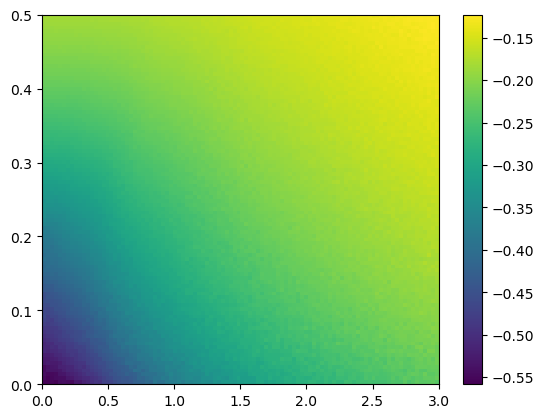

In [4]:
plt.imshow(lossres[1],extent=(0, 3, 0, 0.5), origin='lower', aspect='auto')
plt.colorbar()

In [5]:
phases = np.zeros((96,100,3), dtype=int)
phases[np.logical_and(lossres[0]<lossres[1], lossres[0]<lossres[2])] = np.array([244, 111, 67]) # adam
phases[np.logical_and(lossres[1]<lossres[0], lossres[1]<lossres[2])] = np.array([128, 166, 226]) # focus
phases[np.logical_and(lossres[2]<lossres[1], lossres[2]<lossres[0])] = np.array([251, 221, 133]) # signum

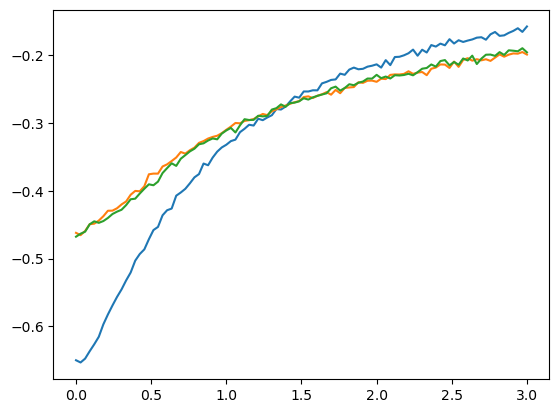

In [6]:
plt.plot(np.linspace(0,3,100),lossres[0,19])
plt.plot(np.linspace(0,3,100),lossres[1,19])
plt.plot(np.linspace(0,3,100),lossres[2,19])

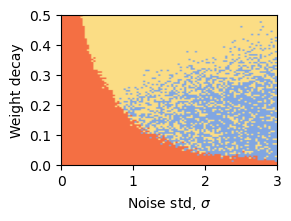

In [7]:
plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.imshow(phases,extent=(0, 3, 0, 0.5), origin='lower', aspect='auto')
plt.ylabel('Weight decay')
plt.xlabel(r'Noise std, $\sigma$')
plt.savefig('../figures/syn-exp-6-1.pdf')

In [8]:
phases2 = np.zeros((96,100,3), dtype=int)
phases2[lossres[0]<lossres[2]] = np.array([244, 111, 67]) # adam
phases2[lossres[2]<lossres[0]] = np.array([251, 221, 133]) # signum

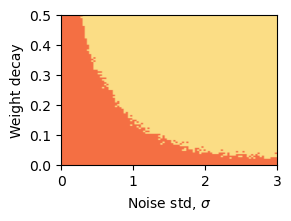

In [13]:
plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.imshow(phases2,extent=(0, 3, 0, 0.5), origin='lower', aspect='auto',vmax=2)
plt.ylabel('Weight decay')
plt.xlabel(r'Noise std, $\sigma$')
plt.savefig('../figures/syn-exp-6-2.pdf')

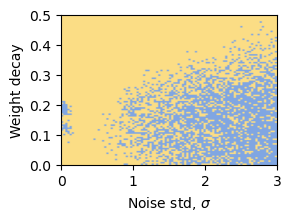

In [14]:
phases3 = np.zeros((96,100,3), dtype=int)
#phases3[lossres[0]<lossres[2]] = np.array([244, 111, 67]) # adam
phases3[lossres[2]<lossres[1]] = np.array([251, 221, 133]) # signum
phases3[lossres[1]<lossres[2]] = np.array([128, 166, 226]) # focus

plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.imshow(phases3,extent=(0, 3, 0, 0.5), origin='lower', aspect='auto',vmax=2)
plt.ylabel('Weight decay')
plt.xlabel(r'Noise std, $\sigma$')
plt.savefig('../figures/syn-exp-6-3.pdf')

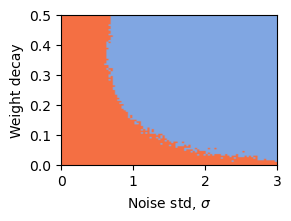

In [15]:
phases4 = np.zeros((96,100,3), dtype=int)
phases4[lossres[0]<lossres[1]] = np.array([244, 111, 67]) # adam
#phases4[lossres[2]<lossres[1]] = np.array([251, 221, 133]) # signum
phases4[lossres[1]<lossres[0]] = np.array([128, 166, 226]) # focus

plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.imshow(phases4,extent=(0, 3, 0, 0.5), origin='lower', aspect='auto',vmax=2)
plt.ylabel('Weight decay')
plt.xlabel(r'Noise std, $\sigma$')
plt.savefig('../figures/syn-exp-6-4.pdf')

In [10]:
min_min_loss = np.min(lossres, axis=1)

In [11]:
phases3 = np.zeros((96,100))
phases3[np.logical_and(bestloss[0]<bestloss[1], bestloss[0]<bestloss[2])] = 0
phases3[np.logical_and(bestloss[1]<bestloss[0], bestloss[1]<bestloss[2])] = 1
phases3[np.logical_and(bestloss[2]<bestloss[1], bestloss[2]<bestloss[0])] = 2

Text(0, 0.5, 'Weight decay')

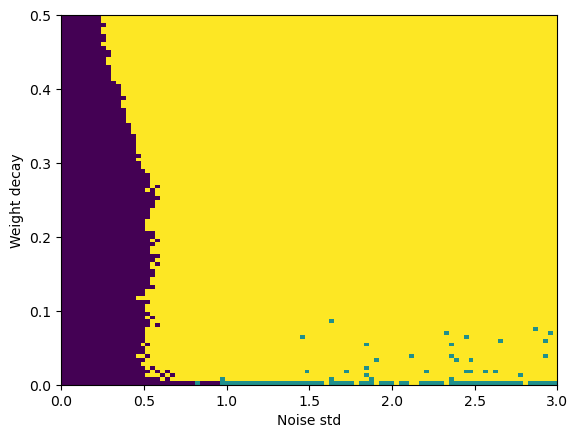

In [12]:
plt.imshow(phases3,extent=(0, 3, 0, 0.5), origin='lower', aspect='auto')
plt.xlabel('Noise std')
plt.ylabel('Weight decay')

In [13]:
phases4 = np.zeros((96,100))
phases4[np.logical_and(deepparam[0]>deepparam[1], deepparam[0]>deepparam[2])] = 0
phases4[np.logical_and(deepparam[1]>deepparam[0], deepparam[1]>deepparam[2])] = 1
phases4[np.logical_and(deepparam[2]>deepparam[1], deepparam[2]>deepparam[0])] = 2

Text(0, 0.5, 'Weight decay')

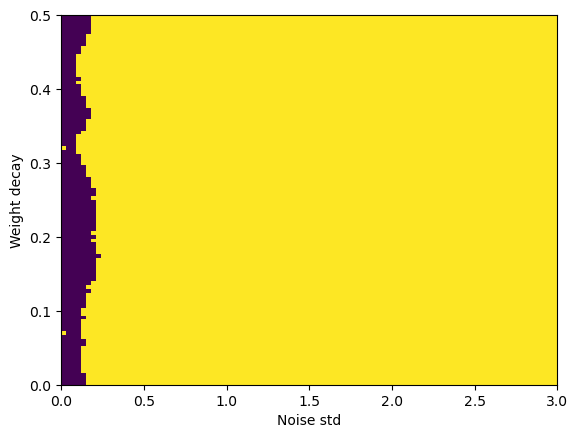

In [14]:
plt.imshow(phases4,extent=(0, 3, 0, 0.5), origin='lower', aspect='auto')
plt.xlabel('Noise std')
plt.ylabel('Weight decay')

In [15]:
CV = std_loss / np.abs(lossres)

In [16]:
phases5 = np.zeros((96,100))
phases5[np.logical_and(CV[0]<CV[1], CV[0]<CV[2])] = 0
phases5[np.logical_and(CV[1]<CV[0], CV[1]<CV[2])] = 1
phases5[np.logical_and(CV[2]<CV[1], CV[2]<CV[0])] = 2

Text(0, 0.5, 'Weight decay')

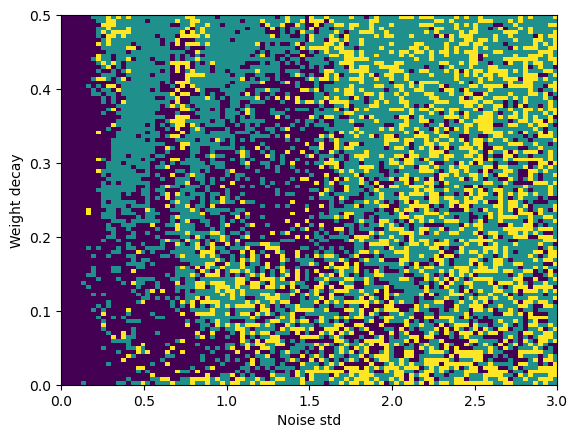

In [17]:
plt.imshow(phases5,extent=(0, 3, 0, 0.5), origin='lower', aspect='auto')
plt.xlabel('Noise std')
plt.ylabel('Weight decay')